### Titanic régréssion linéaire

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns

### Import du data set

In [4]:
train = r"C:\Users\Shadow\Desktop\brief_projet_2\train.csv"
df_train = pd.read_csv(train, sep=',')
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### Supprimer les valeurs nulles, s’il en existe

In [8]:
num_missing_X = lambda x: sum(x.isnull())
print("Valeurs manquantes par colonne:\n", df_train.apply(num_missing_X, axis=0))

Valeurs manquantes par colonne:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Choisir les variables explicatives (features) en menant une analyse de corrélation


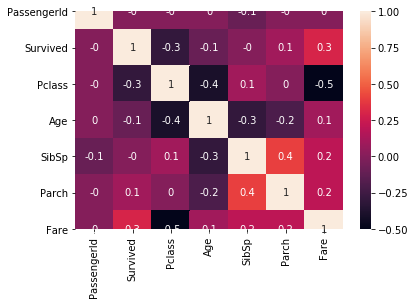

In [10]:
matrice_corr = df_train.corr().round(1)
sns.heatmap(data=matrice_corr,annot=True)

### Divison du data set pour training 

In [46]:
df_train['Sex'] = pd.Categorical(df_train['Sex']).codes
df_train['Embarked'] = pd.Categorical(df_train['Embarked']).codes
from sklearn.model_selection import train_test_split
features = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis = 1) 
target = df_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state=5)
print(type(X_test))
print(type(y_test))
print(type(train_y_pred))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


### Creation d'un objet de creation linéaire


In [36]:
regr = linear_model.LinearRegression()

### Entrainement du modef utilsant l'ensemble entrainement


In [37]:

regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Faire des prediction utilisant l'ensemble test

In [38]:
train_y_pred = regr.predict(X_test)

### Coef

In [39]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [-1.68422981e-01 -5.21328696e-01 -1.83904819e-03 -3.25662298e-02
 -3.76248329e-03 -1.39589839e-04 -3.42456036e-02]


### Erreur quadratique moyenne

In [40]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, train_y_pred))

Mean squared error: 0.14


### Coefficient de determination: 1 = perfect prediction

In [42]:
print('Coefficient of determination: %.2f'
      % r2_score(y_test, train_y_pred))

Coefficient of determination: 0.39


### Graph

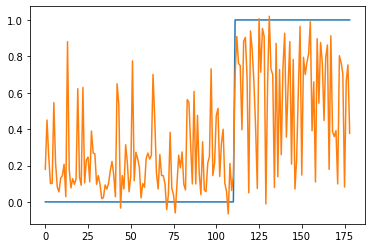

In [55]:
to_plot = pd.DataFrame([[y_test.to_numpy()[i], train_y_pred[i]] for i in range(len(y_test))], columns = ['test', 'pred'])
to_plot = to_plot.sort_values('test')  
plt.plot(list(range(len(to_plot))), to_plot['test'])
plt.plot(list(range(len(to_plot))), to_plot['pred'])
plt.show()